In [1]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

!gdown --id 1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
100% 150M/150M [00:01<00:00, 94.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U
To: /content/validation-horse-or-human.zip
100% 11.5M/11.5M [00:00<00:00, 74.5MB/s]


In [2]:
import zipfile 

# Unzip the training set
local_zip = "./horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip,"r")
zip_ref.extractall("./horse-or-human")

# Unzipping the validation set
local_zip = "./validation-horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip,"r")
zip_ref.extractall("./validation-horse-or-human")

zip_ref.close()

In [3]:
import os 

# Directory with the horse training pics
train_horse_dir = os.path.join("./horse-or-human/horses")

# Directory with the human tranining pics
train_human_dir = os.path.join("./horse-or-human/humans")

# Directory with validation horse pics 
validation_horse_dir = os.path.join("./validation-horse-or-human/horses")

# Directort with validation human pics
validation_human_dir = os.path.join("./validation-horse-or-human/humans")

In [4]:
# Checking file names 

train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

valid_horse_names = os.listdir(validation_horse_dir)
print(valid_horse_names[:10])

valid_human_names = os.listdir(validation_human_dir)
print(valid_human_names[:10])

['horse24-7.png', 'horse28-8.png', 'horse48-5.png', 'horse25-1.png', 'horse21-7.png', 'horse37-3.png', 'horse34-0.png', 'horse49-5.png', 'horse32-0.png', 'horse03-4.png']
['human10-19.png', 'human11-18.png', 'human16-21.png', 'human07-02.png', 'human09-15.png', 'human06-14.png', 'human09-19.png', 'human04-24.png', 'human15-25.png', 'human15-18.png']
['horse4-588.png', 'horse3-011.png', 'horse1-000.png', 'horse4-302.png', 'horse3-099.png', 'horse1-335.png', 'horse1-264.png', 'horse2-383.png', 'horse5-402.png', 'horse4-495.png']
['valhuman03-07.png', 'valhuman04-12.png', 'valhuman03-18.png', 'valhuman02-23.png', 'valhuman04-07.png', 'valhuman03-19.png', 'valhuman05-19.png', 'valhuman03-17.png', 'valhuman03-03.png', 'valhuman04-13.png']


In [5]:
print(f"Total training horse images:{len(train_horse_names)}")
print(f"Total training horse images:{len(train_human_names)}")
print(f"Total training horse images:{len(valid_horse_names)}")
print(f"Total training horse images:{len(valid_horse_names)}")

Total training horse images:500
Total training horse images:527
Total training horse images:128
Total training horse images:128


In [7]:
%matplotlib inline 

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 

# Creating dimensions for our iamge 
nrows = 4
ncols = 4

# Starting Index 
pic_index = 0

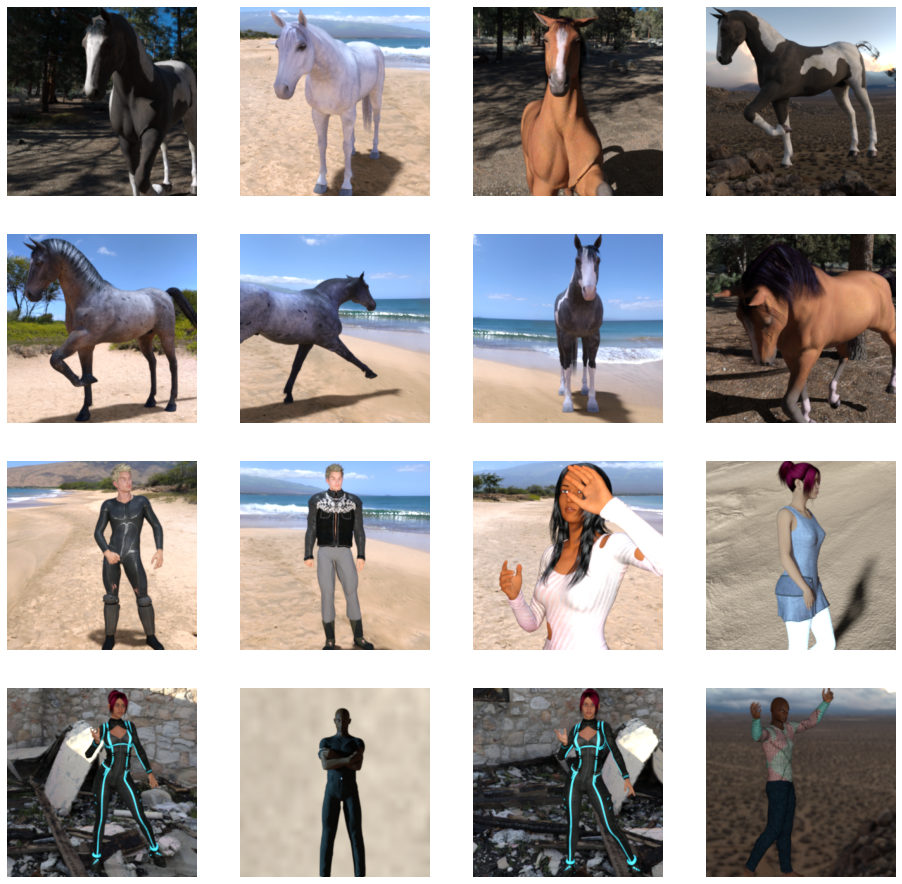

In [8]:
# Displaying the images 

fig = plt.gcf()
fig.set_size_inches(nrows*4,ncols*4)


pic_index += 8

next_horse_pic = [os.path.join(train_horse_dir,fn)
                  for fn in train_horse_names[pic_index-8:pic_index]]
next_human_pic = [os.path.join(train_human_dir,fn)
                  for fn in train_human_names[pic_index-8:pic_index]]

for i, image_path in enumerate(next_horse_pic + next_human_pic):
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis("Off")
  sp.grid(False)

  img = mpimg.imread(image_path)
  plt.imshow(img)

plt.show()

## Building a model from scratch

In [9]:
import tensorflow as tf

In [10]:
model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(300,300,3)),
        tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),
                               activation=tf.keras.activations.relu),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),
                               activation=tf.keras.activations.relu),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),
                               activation=tf.keras.activations.relu),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),
                               activation=tf.keras.activations.relu),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),
                               activation=tf.keras.activations.relu),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=512,activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(units=1,activation=tf.keras.activations.sigmoid)
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [12]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=["accuracy"])

## Data Preprocessing

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
                "./horse-or-human/",
                target_size=(300,300),
                batch_size=128,
                class_mode="binary"
)

validation_generator = val_datagen.flow_from_directory(
                "./validation-horse-or-human/",
                target_size=(300,300),
                batch_size=32,
                class_mode="binary"
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    validation_data=validation_generator,
    verbose=1,
    validation_steps=8
)

Epoch 1/15
8/8 [==============================] - 102s 13s/step - loss: 0.6932 - accuracy: 0.5840 - val_loss: 0.6858 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 109s 14s/step - loss: 0.6180 - accuracy: 0.6585 - val_loss: 0.3439 - val_accuracy: 0.8672
Epoch 3/15
8/8 [==============================] - 98s 12s/step - loss: 0.4738 - accuracy: 0.8131 - val_loss: 1.9524 - val_accuracy: 0.5273
Epoch 4/15
8/8 [==============================] - 99s 12s/step - loss: 0.2162 - accuracy: 0.9132 - val_loss: 3.5019 - val_accuracy: 0.5312
Epoch 5/15
8/8 [==============================] - 102s 15s/step - loss: 0.4842 - accuracy: 0.7887 - val_loss: 0.7593 - val_accuracy: 0.7500
Epoch 6/15
8/8 [==============================] - 121s 15s/step - loss: 0.1597 - accuracy: 0.9434 - val_loss: 1.2879 - val_accuracy: 0.7930
Epoch 7/15
8/8 [==============================] - 105s 13s/step - loss: 0.1698 - accuracy: 0.9366 - val_loss: 0.5810 - val_accuracy: 0.8711
Epoch 8/15
8/8 [======

In [18]:
# Model prediction in uploaded images 

import numpy as np
from google.colab import files
from keras.preprocessing import image 


uploaded = files.upload()

for fn in uploaded.keys():
  
  # predicting the images
  path = "/content/" + fn
  img = image.load_img(path,target_size=(300,300))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x,axis=0)

  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(classes[0])
  if classes[0] > 0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving photo-1598974357801-cbca100e65d3.jfif to photo-1598974357801-cbca100e65d3 (1).jfif
[0.38085672]
photo-1598974357801-cbca100e65d3.jfif is a horse


## Visualizing Intermediate Representations

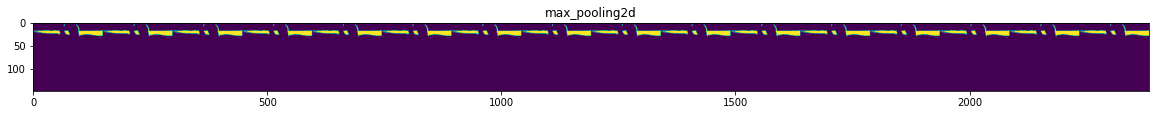

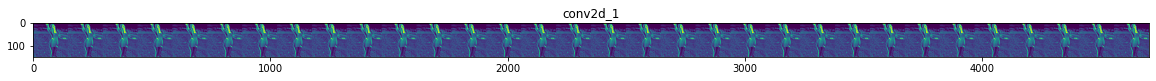

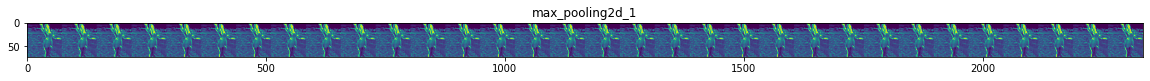

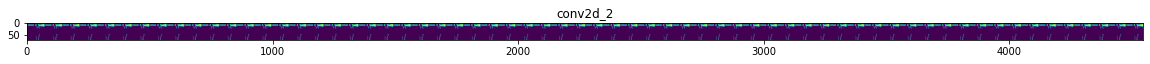

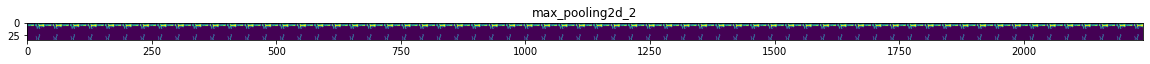

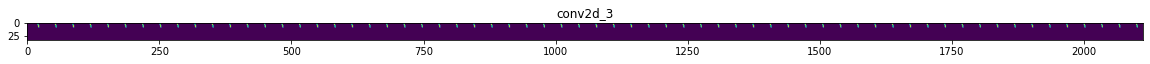

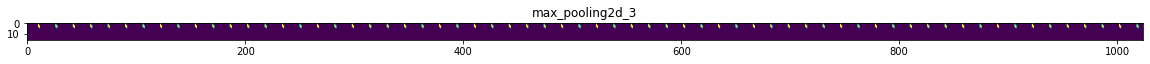

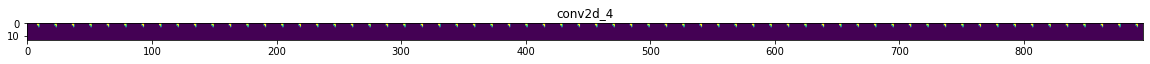

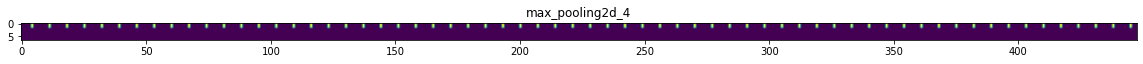

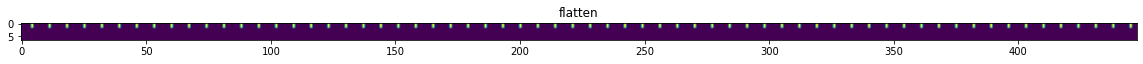

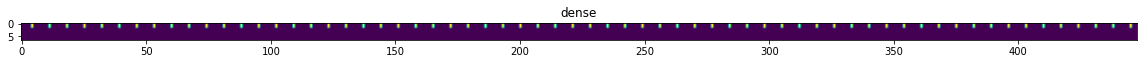

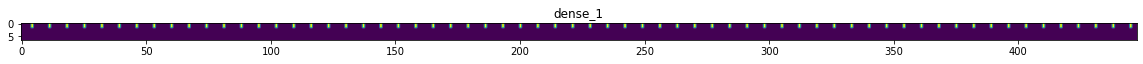

In [20]:
import numpy as np 
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import img_to_array,load_img


successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs= model.input,outputs = successive_outputs)

horse_img_files = [os.path.join(train_horse_dir,fn) for fn in train_horse_names]
human_img_files = [os.path.join(train_human_dir,fn) for fn in train_human_names]
img_path = random.choice(horse_img_files+human_img_files)

img = load_img(img_path,target_size=(300,300))
x = img_to_array(img)
x = x.reshape((1,) + x.shape) # image shape = (1,300,300,3)
x /= 255

successive_feature_maps = visualization_model.predict(x)

# taking the names of the layer
layer_names = [layer.name for layer in model.layers[1:]]

# Display the whole picture 
for layer_name ,feature_map in zip(layer_names,successive_feature_maps):
   # zip combines the content of 2 or more iterables
    if len(feature_map.shape) == 4:
      n_features=feature_map.shape[-1]
      size = feature_map.shape[1]

      display_grid = np.zeros((size,size * n_features))
      for i in range(n_features):
        x  = feature_map[0,:,:,1]
        x -= x.mean()
        x /= x.std()
        x *=64
        x += 128
        x = np.clip(x,0,255).astype("uint8")
        display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
(